<a href="https://colab.research.google.com/github/Itiel-z/BIA-Projects/blob/main/Project_1/Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project 1 - Itiel

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime

In [ ]:
# Data collection
try:
  if not os.path.exists("historical_stocks.csv") or not os.path.exists("historical_stock_prices.csv"):
    raise FileNotFoundError("CSV files not found in current directory.")
  else:
    stocks = pd.read_csv("historical_stocks.csv", encoding='utf-8')
    stock_prices = pd.read_csv("historical_stock_prices.csv", encoding='utf-8')
  if stocks.empty or stock_prices.empty:
    raise ValueError("One or both of the files loaded are empty.")
  print("Successfully loaded both datasets!")
except Exception as e:
  print(f"Error loading data: {str(e)}")
  raise

Successfully loaded both datasets!


In [ ]:
# Display the first few files of the stocks dataframe
stocks.head()

,ticker,exchange,name,sector,industry
0,PIH,NASDAQ,"1347 PROPERTY INSURANCE HOLDINGS, INC.",FINANCE,PROPERTY-CASUALTY INSURERS
1,PIHPP,NASDAQ,"1347 PROPERTY INSURANCE HOLDINGS, INC.",FINANCE,PROPERTY-CASUALTY INSURERS
2,TURN,NASDAQ,180 DEGREE CAPITAL CORP.,FINANCE,FINANCE/INVESTORS SERVICES
3,FLWS,NASDAQ,"1-800 FLOWERS.COM, INC.",CONSUMER SERVICES,OTHER SPECIALTY STORES
4,FCCY,NASDAQ,1ST CONSTITUTION BANCORP (NJ),FINANCE,SAVINGS INSTITUTIONS


In [ ]:
# display the first few files of stock_prices dataframe
stock_prices.head()

,ticker,open,close,adj_close,low,high,volume,date
0,AHH,11.50,11.58,8.493155,11.25,11.68,4633900.0,2013-05-08
1,AHH,11.66,11.55,8.471151,11.50,11.66,275800.0,2013-05-09
2,AHH,11.55,11.60,8.507822,11.50,11.60,277100.0,2013-05-10
3,AHH,11.63,11.65,8.544494,11.55,11.65,147400.0,2013-05-13
4,AHH,11.60,11.53,8.456484,11.50,11.60,184100.0,2013-05-14


In [ ]:
# Basic information about the stock_price df
stock_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8869228 entries, 0 to 8869227
Data columns (total 8 columns):
 #   Column     Dtype  
---  ------     -----  
 0   ticker     object 
 1   open       float64
 2   close      float64
 3   adj_close  float64
 4   low        float64
 5   high       float64
 6   volume     float64
 7   date       object 
dtypes: float64(6), object(2)
memory usage: 541.3+ MB


In [ ]:
# Check for missing values in the stock_prices df
stock_prices.isnull().sum()

,0
ticker,0
open,0
close,0
adj_close,1
low,1
high,1
volume,1
date,1


In [ ]:
# Forward fill the missing values
stock_prices.ffill( inplace=True)

In [ ]:
# Basic information about the stocks df
stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6460 entries, 0 to 6459
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ticker    6460 non-null   object
 1   exchange  6460 non-null   object
 2   name      6460 non-null   object
 3   sector    5020 non-null   object
 4   industry  5020 non-null   object
dtypes: object(5)
memory usage: 252.5+ KB


In [ ]:
# Check for duplicates in the stock_prices df
stock_prices.duplicated().sum()

np.int64(0)

In [ ]:
# Check for duplicates in the stocks df
stocks.duplicated().sum()

np.int64(0)

In [ ]:
# Handle missing 'sector' values using the mode
sector_mapping = (stocks.dropna(subset=['sector'])
    .groupby('ticker')['sector']
    .agg(lambda x: x.mode().iloc[0]))
stocks['sector'] = stocks['sector'].fillna(stocks['ticker'].map(sector_mapping))

# Handle missing 'industry' values using the mode
industry_mapping = (stocks.dropna(subset=['industry'])
    .groupby('ticker')['industry']
    .agg(lambda x: x.mode().iloc[0]))
stocks['industry'] = stocks['industry'].fillna(stocks['ticker'].map(industry_mapping))

# Drop rows where sector or industry is still missing after mapping
stocks = stocks.dropna(subset=['sector', 'industry'])

In [ ]:
# Verifying that there are no missing values anymore
stocks.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5020 entries, 0 to 6459
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ticker    5020 non-null   object
 1   exchange  5020 non-null   object
 2   name      5020 non-null   object
 3   sector    5020 non-null   object
 4   industry  5020 non-null   object
dtypes: object(5)
memory usage: 235.3+ KB


In [ ]:
# Convert datetime and set as index
stock_prices['date'] = pd.to_datetime(stock_prices['date'], format='%Y-%m-%d')
stock_prices = stock_prices.sort_values(by='date')
stock_prices.set_index('date', inplace=True)

In [ ]:
print(stock_prices.isna().sum())

ticker       0
open         0
close        0
adj_close    0
low          0
high         0
volume       0
dtype: int64


In [ ]:
# Create decade column
stock_prices['decade'] = stock_prices.index.year // 10 * 10

# Get the list of the decades
decades = sorted(stock_prices['decade'].unique())

# create a dictionary to store decades df and create keys
decades_df = {}
for decade in decades:
    decades_df[decade] = stock_prices[stock_prices['decade'] == decade]

In [ ]:
# Merge the stock_prices df to include sector
merged = stock_prices.merge(stocks[['ticker', 'sector']], on='ticker', how='left')

In [ ]:
merged.head()

,ticker,open,close,adj_close,low,high,volume,decade,sector
0,XOM,1.929688,1.937500,0.025623,1.925781,1.937500,1174400.0,1970,ENERGY
1,MMM,6.851562,6.851562,0.438697,6.843750,6.890625,72000.0,1970,HEALTH CARE
2,CNP,11.099500,11.169750,0.107916,10.994125,11.204875,24400.0,1970,PUBLIC UTILITIES
3,JNJ,1.250000,1.218750,0.000004,1.218750,1.253472,1195200.0,1970,HEALTH CARE
4,MRO,5.633611,5.757882,0.203525,5.633611,5.757882,105900.0,1970,ENERGY


In [ ]:
# Analysis by decade
def calculate_decade_stats(decade_df, decade):
  print(f"Summary statistics for {decade}s:")
  stats = decade_df[price_columns + ['volume']].describe().transpose()
  stats['median'] = decade_df[price_columns + ['volume']].median()
  stats['IQR'] = stats['75%'] - stats['25%']
  # Select specific columns for printing
  print(stats[['mean', 'std', 'min', 'max', 'median', '25%', '50%', '75%', 'IQR', 'count']])
  return stats

In [ ]:
price_columns = ['open', 'close', 'adj_close', 'low', 'high']
decade_stats = {}
for decade, decade_df in decades_df.items():
  decade_stats[decade] = calculate_decade_stats(decade_df, decade)

Summary statistics for 1970s:
                    mean            std         min           max  \
open            5.579434       5.707913    0.108800  3.266667e+01   
close           5.578749       5.708809    0.108800  3.266667e+01   
adj_close       1.278837       2.115477    0.000002  2.190293e+01   
low             5.516534       5.646278    0.108800  3.241667e+01   
high            5.656381       5.768412    0.140800  3.308333e+01   
volume     511971.027964  960931.198127  100.000000  2.414880e+07   

                  median          25%            50%            75%  \
open            3.459638     1.537760       3.459638       7.500000   
close           3.458333     1.534091       3.458333       7.500000   
adj_close       0.425593     0.124252       0.425593       1.554151   
low             3.437500     1.526229       3.437500       7.414826   
high            3.552912     1.562500       3.552912       7.625000   
volume     100000.000000  8100.000000  100000.000000  576000

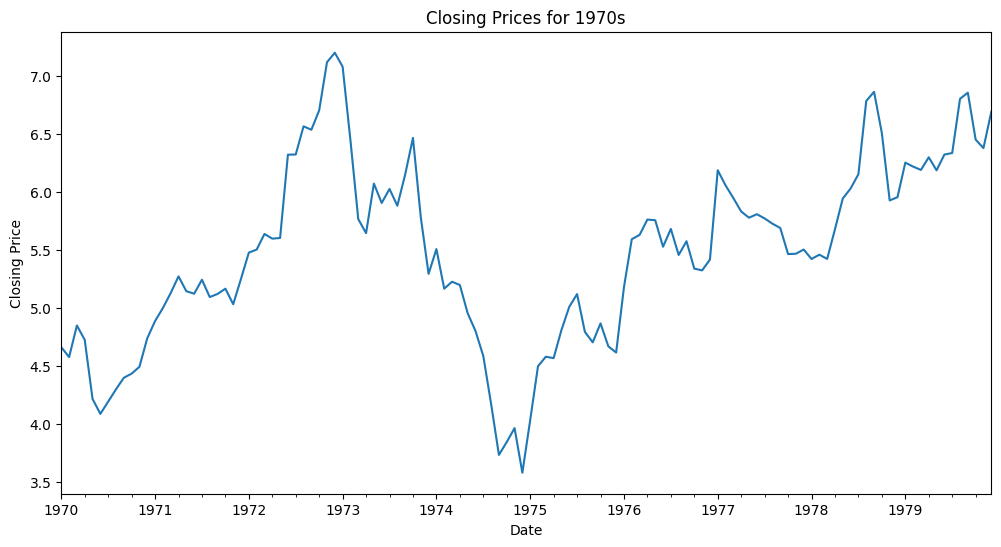

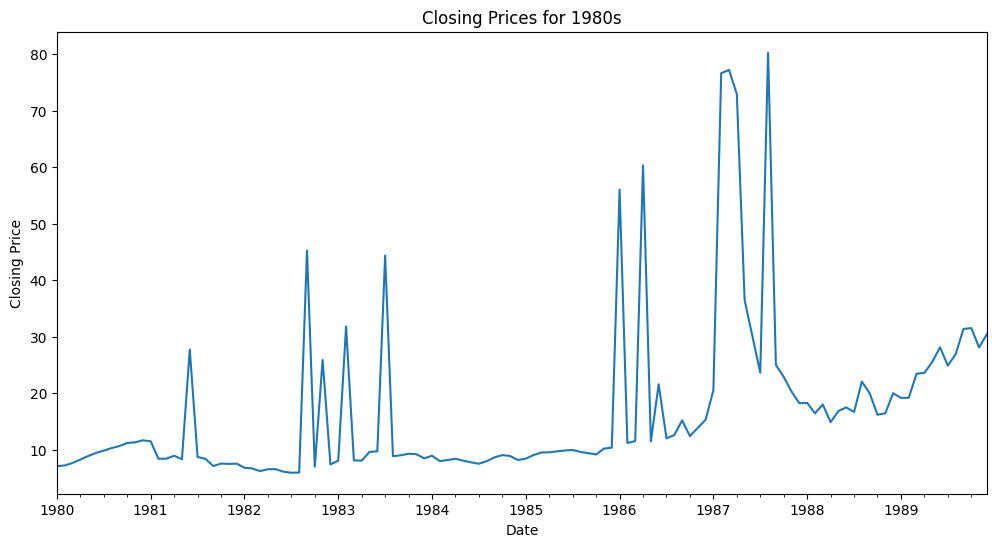

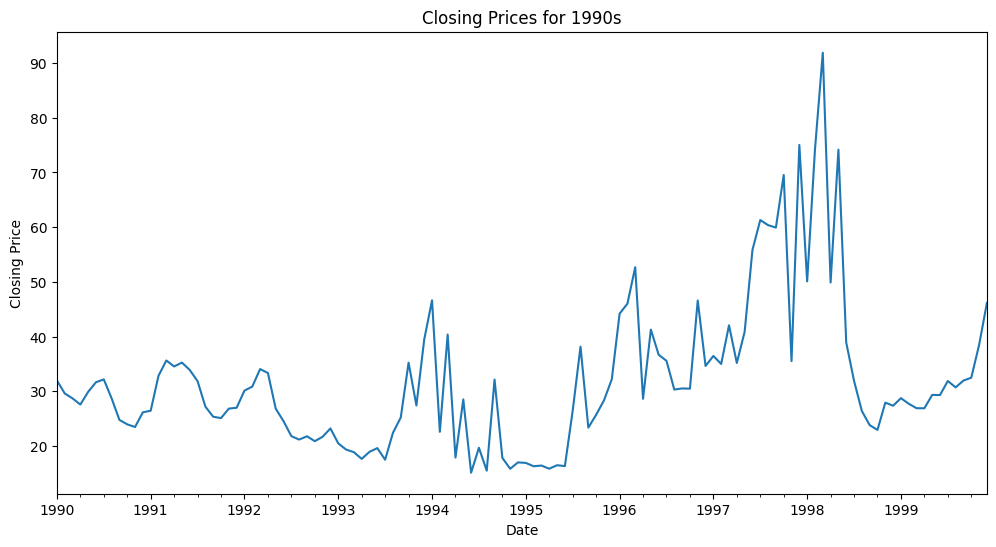

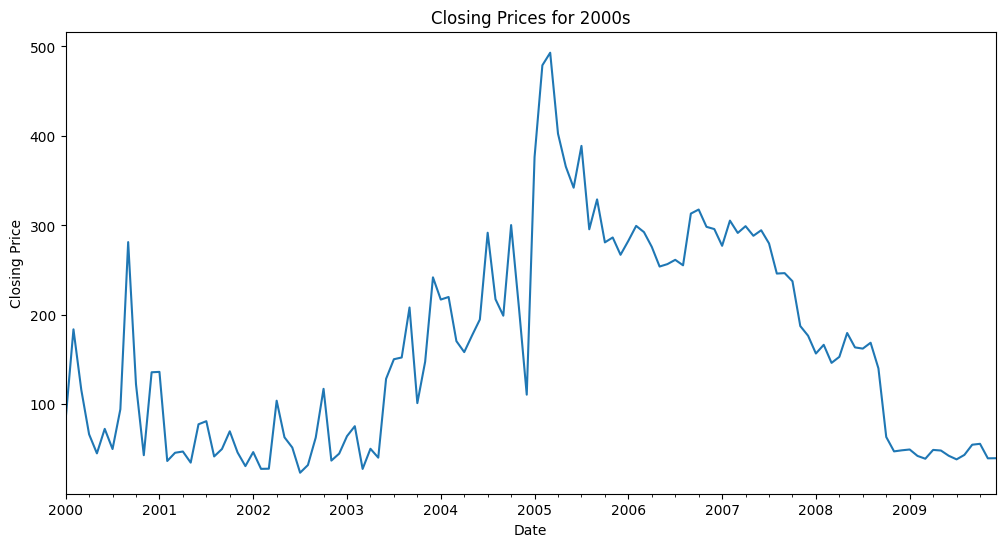

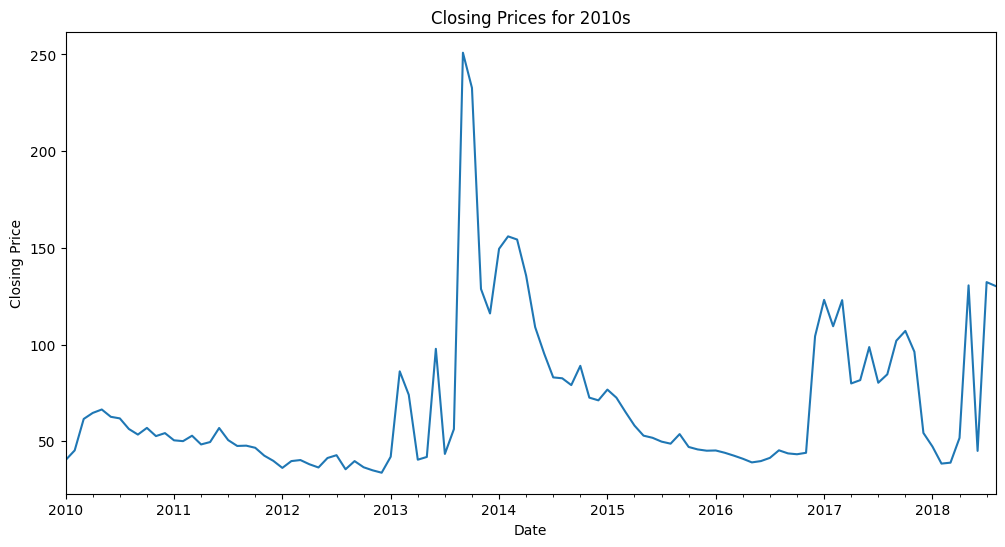

In [ ]:
# Visualizations
for decade, decade_df in decades_df.items():
  plt.figure(figsize=(12, 6))
  decade_df.resample('ME')['close'].mean().plot(title=f'Closing Prices for {decade}s')
  plt.xlabel('Date')
  plt.ylabel('Closing Price')
  plt.show()

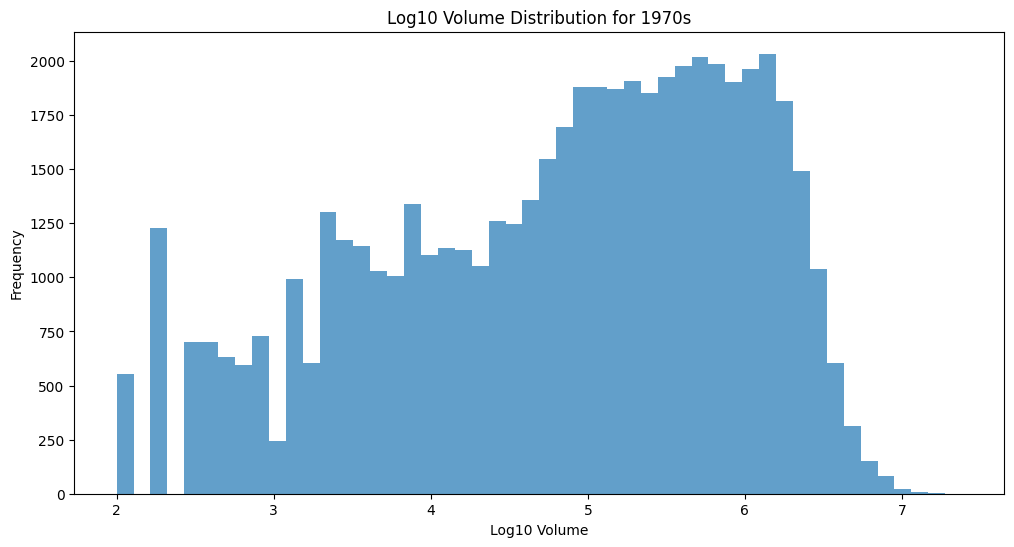

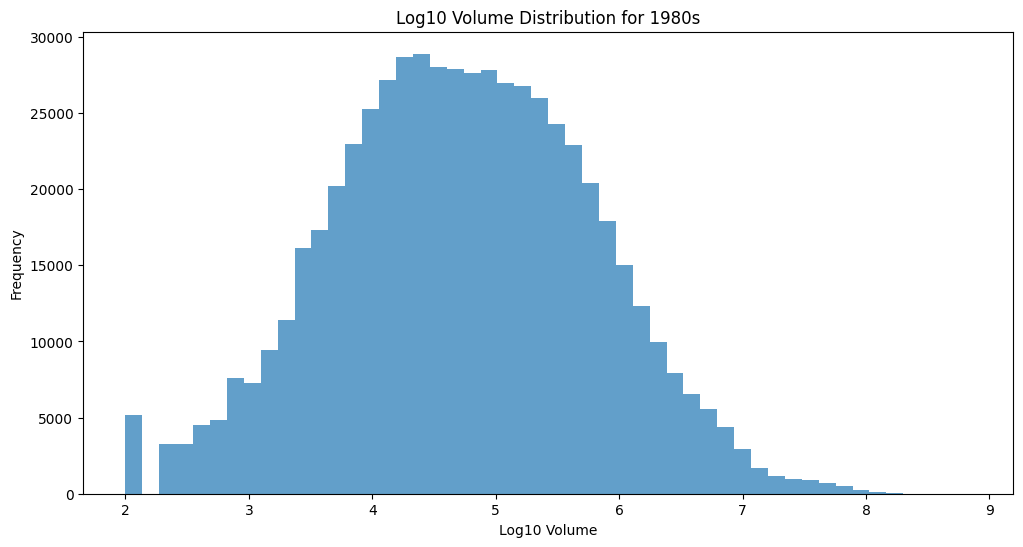

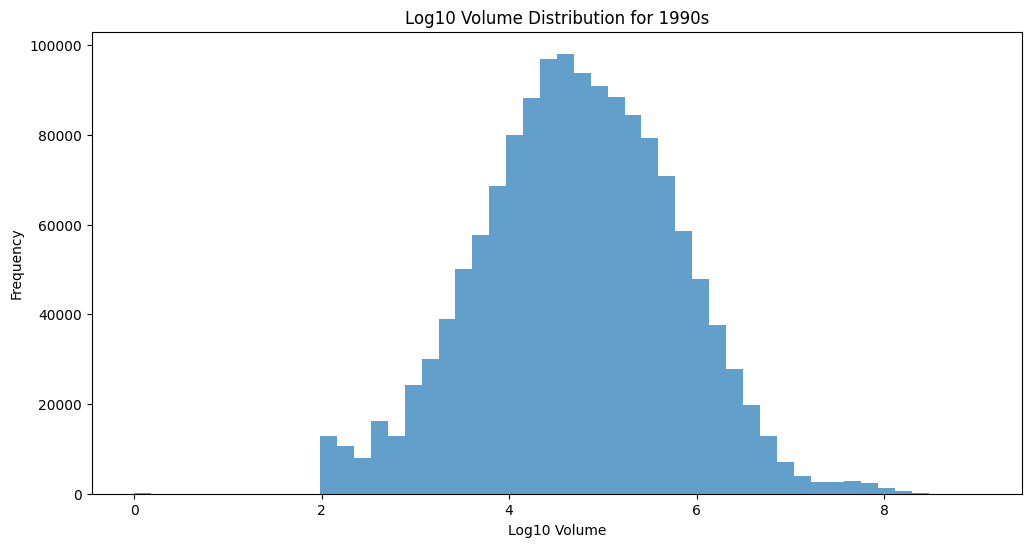

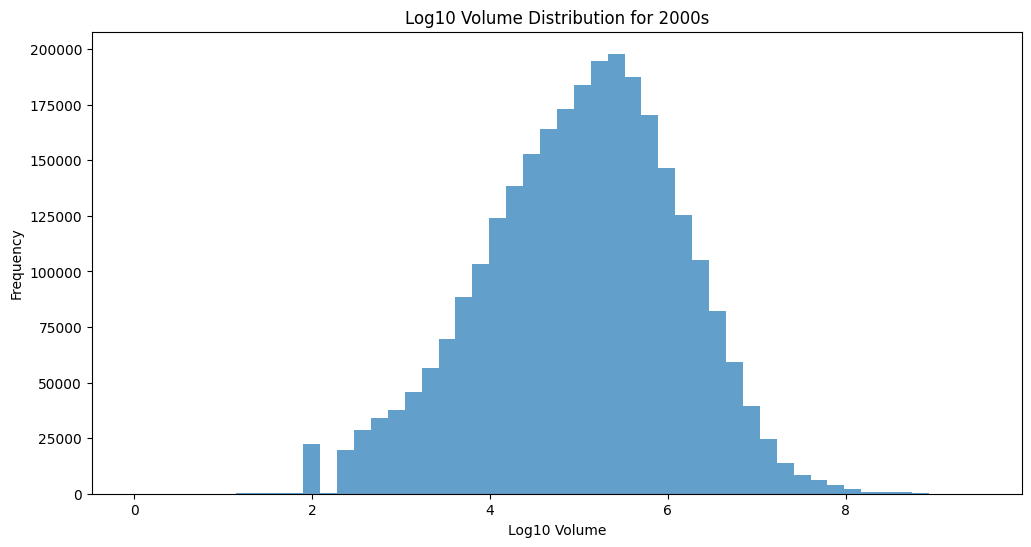

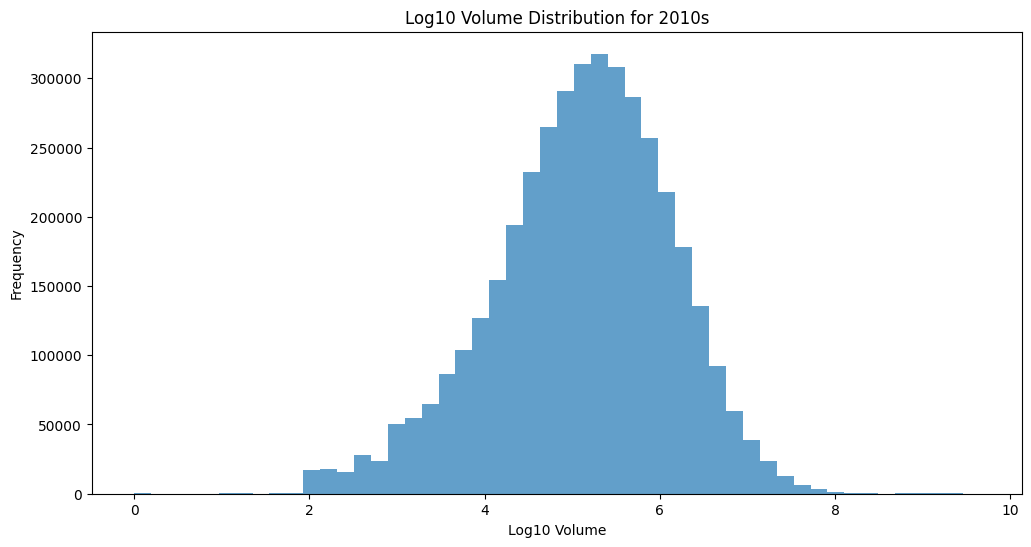

In [ ]:
# Histogram of volume
for decade, decade_df in decades_df.items():
  plt.figure(figsize=(12, 6))
  plt.hist(np.log10(decade_df['volume']).dropna(), bins=50, alpha=0.7)
  plt.title(f'Log10 Volume Distribution for {decade}s')
  plt.xlabel('Log10 Volume')
  plt.ylabel('Frequency')
  plt.show()

<Figure size 1200x800 with 0 Axes>

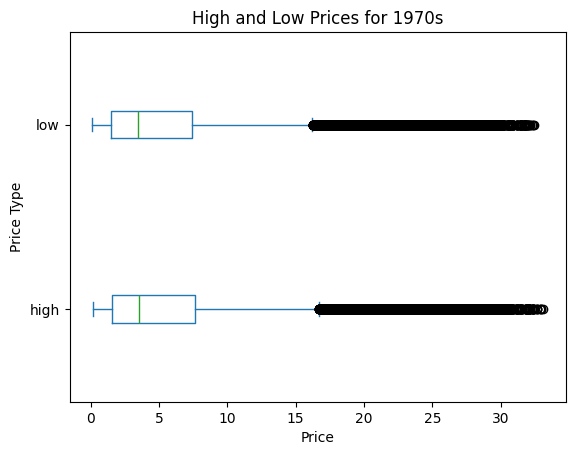

<Figure size 1200x800 with 0 Axes>

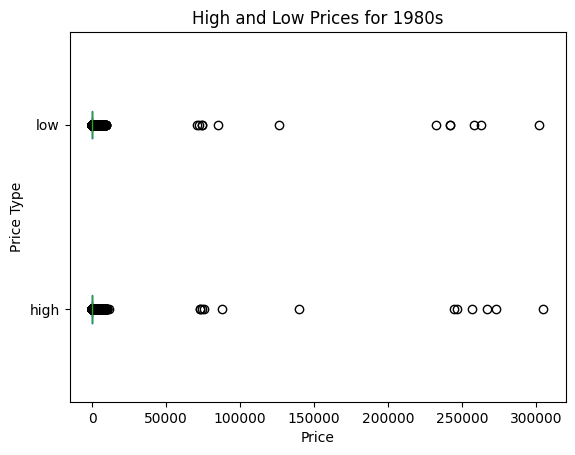

<Figure size 1200x800 with 0 Axes>

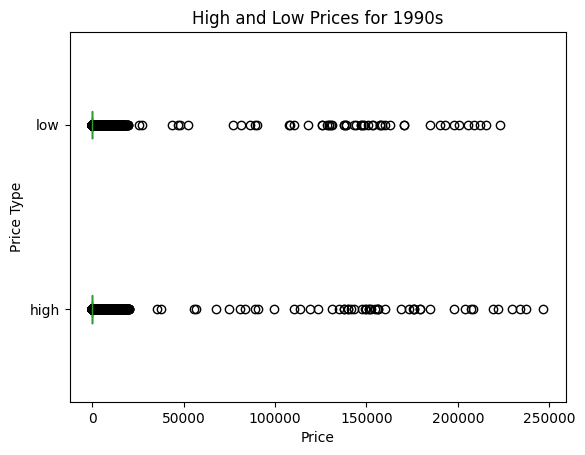

<Figure size 1200x800 with 0 Axes>

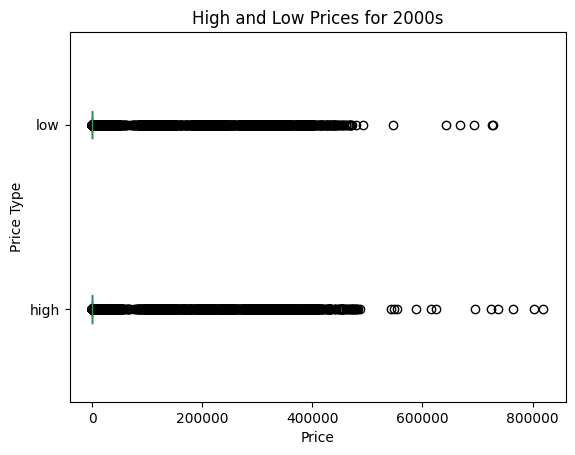

<Figure size 1200x800 with 0 Axes>

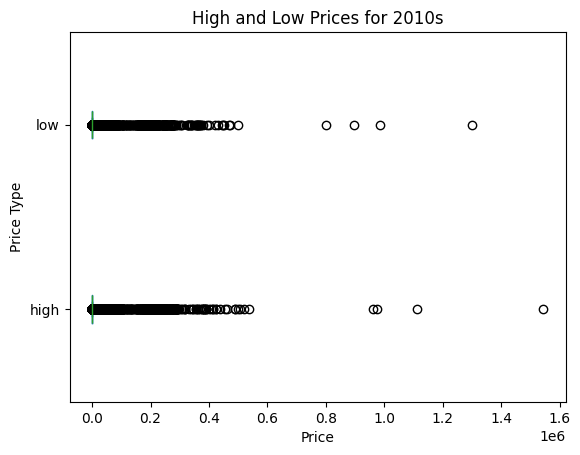

In [ ]:
# boxplot for high and low prices
for decade, decade_df in decades_df.items():
  plt.figure(figsize=(12, 8))
  decade_df[['high', 'low']].plot(kind='box', vert=False)
  plt.title(f'High and Low Prices for {decade}s')
  plt.ylabel('Price Type')
  plt.xlabel('Price')
  plt.show()

# Summary report

Summary of EDA Findings:

1. **Price Trends**: Average monthly closing prices generally increased over time, particularly in the 1990s and 2010s.
2. **Volume Trends**: Trading volume increased significantly in later decades, especially in the 2000s and 2010s, indicating greater market activity.
3. **Volatility**: Boxplots show that price volatility also increased in recent decades, with a wider spread between high and low prices.
4. **Sector Influence**: The merged dataset allows for future sector-based analysis.

Initial Hypotheses:
- Market deregulation and the rise of tech stocks may explain sharp increases post-1990s.
- Economic events (e.g., dot-com bubble, 2008 crash) correlate with volume and price volatility spikes.
- Increasing algorithmic trading may have influenced volume spikes in recent years.

Next Steps:
- Apply statistical tests to validate observed trends.
- Perform sector-based comparisons.
